# Project Statement

The code below provides a visual representation of how the Black-Scholes
call option price changes with respect to time.

a\) Use the visualization to interpret how the rate of change of the
Black-Scholes call option price behaves as time progresses.

b\) Create a separate graphic to visualize how the rate of change of the
Black-Scholes call option price depends on the spot price $S(0)$

c\) Repeat parts a and b for put option prices.

d\) Use the space below to record your observations and reflections
based on the generated plots.

# Given Code

Note we have inverted the $x$ axis (time to expiration) to get a more
intuitive reading of the graph, as the value of an opion decreases as
time of expiration approaches.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:

    Computes the Black-Scholes value of a European call option.

    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate

    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:

    Computes the Black-Scholes value of a European put option.

    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate

    Returns:
        Put option price
    """

    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)





Let $P_c, P_p$ denote the price of a call (respectively, put) option.

# $\frac{\partial P_{c}}{\partial T}$, $T$ time to expiration

In [ ]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)
call_prices = [bs_call(S0,K,sigma, t = i) for i in times]


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.gca().invert_xaxis()
plt.show()


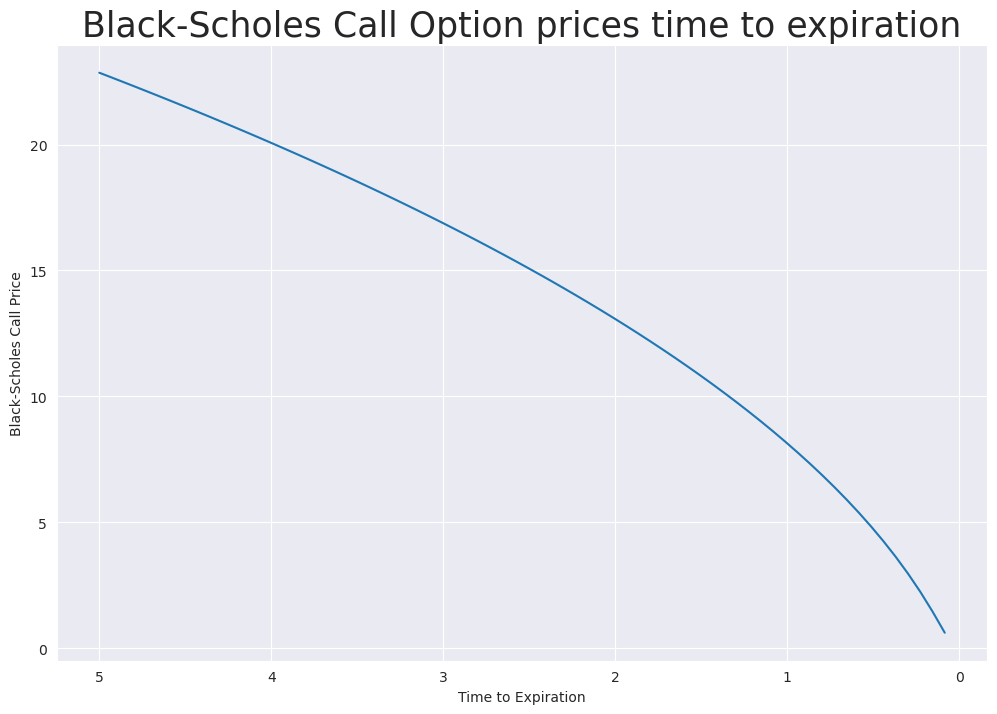

# $\frac{\partial P_{c}}{\partial S(0)}$

In [ ]:
S0 = 100
K = 110
sigma = .3
spots = np.linspace(30, 200, 30)
call_prices = [bs_call(p,K,sigma,1) for p in spots]


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Call Option prices against spot', size = 25)
plt.plot(spots, call_prices)
plt.axvline(x = K, color = 'r', label = 'Strike')
plt.legend(fontsize=20)
plt.xlabel('Spot Price')
plt.ylabel('Black-Scholes Call Price')
plt.show()


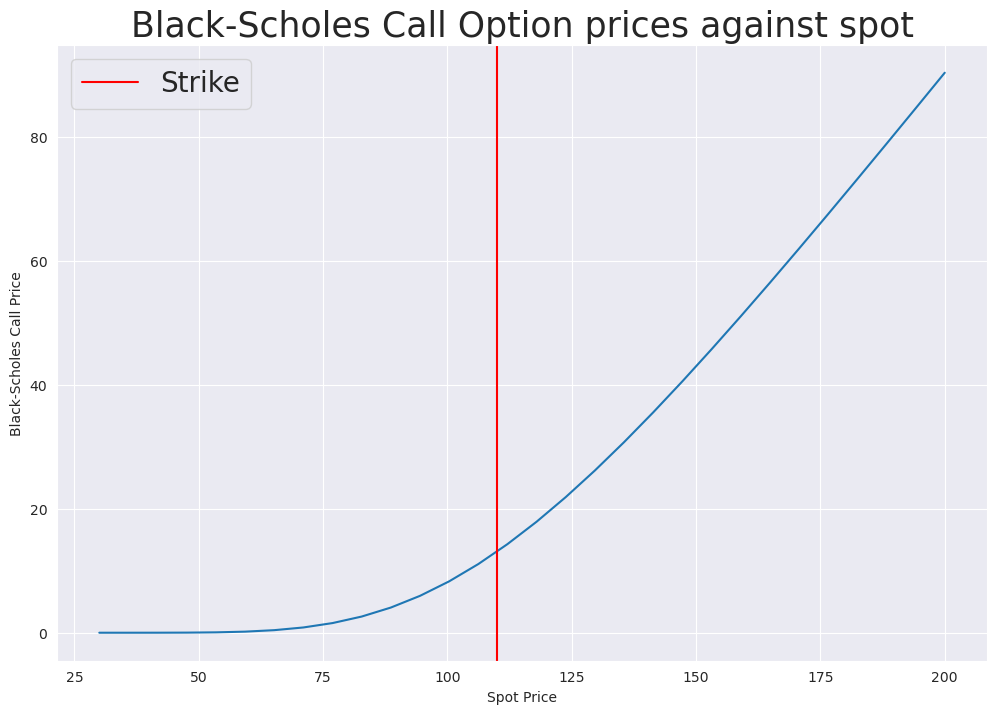

# $\frac{\partial P_p}{\partial T}$, $T$ time to expiration

In [ ]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)
put_prices = [bs_put(S0,K,sigma, i) for i in times]


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Put Option prices time to expiration', size = 25)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration (years)')
plt.ylabel('Black-Scholes Put Price')
plt.gca().invert_xaxis()
plt.show()


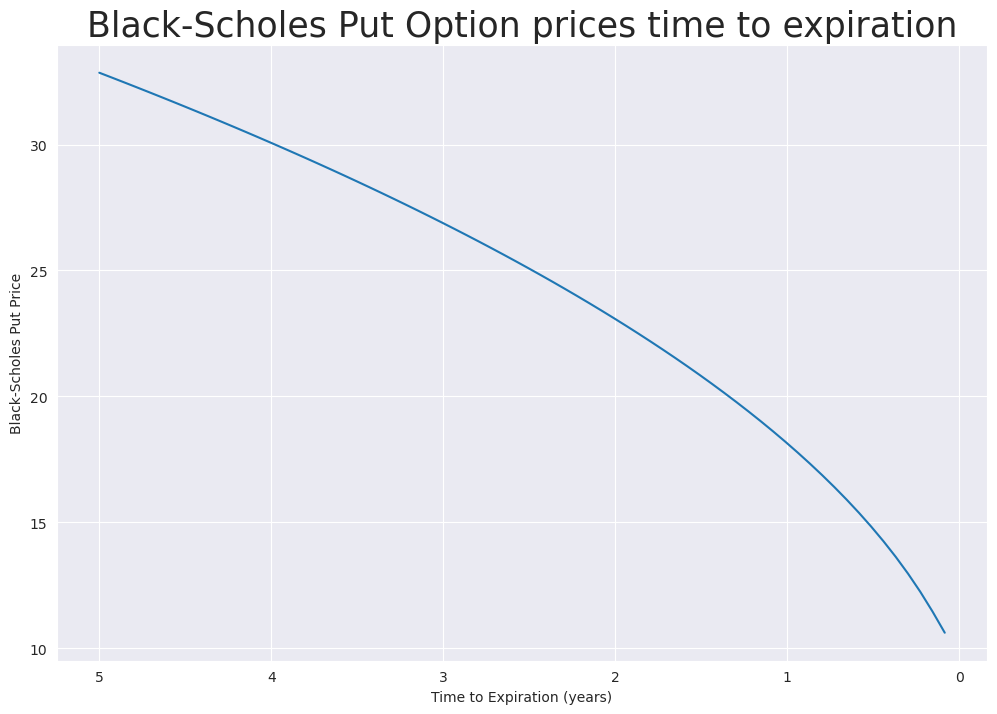

# $\frac{\partial P_{p}}{\partial S(0)}$

In [ ]:
S0 = 100
K = 110
sigma = .3
spots = np.linspace(80, 120, 30)
call_prices = [bs_put(p,K,sigma,1) for p in spots]


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Put Option prices against spot (1 yr to expiry)', size = 20)
plt.plot(spots, call_prices)
plt.axvline(x = K, color = 'r', label = 'Strike')
plt.legend(fontsize=20)
plt.xlabel('Spot',size = 20)
plt.ylabel('Black-Scholes Put Price',size=20)
plt.show()


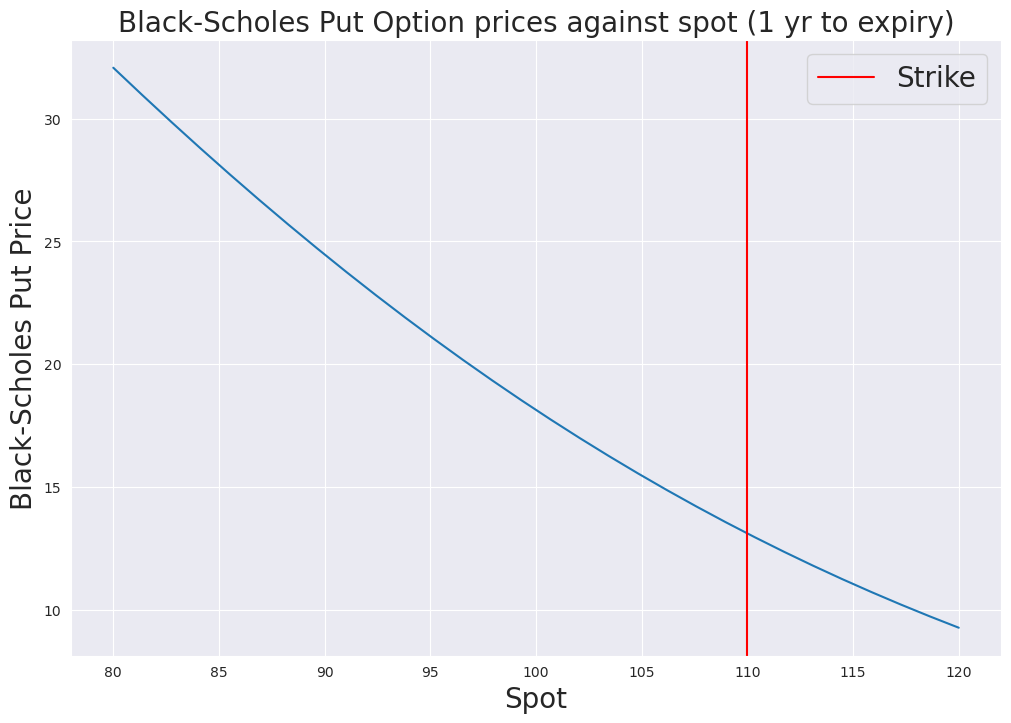

# Observations

## Time Sensitivity

At a constant spot price of $100$ and strike price of $110$, both the
call and put options decayed in price as the expiry time approached.

### Call Option

The decay of the call option accelerated as the time to expiry got
closer and closer. This can be formalized by the hypothesis that the
second partial derivative of $P_c$ with respect to the time to expiry is
a strictly negative function of time. i.e. the price-time to expiry
relationship is concave down when the strike is OTM. This quantity is
known as *theta*, and is one of the fundamental greeks used in options
analysis.

Because the spot was constantly OTM, the option expires worthless.

### Put Option

All of the analysis of the put option is identical to that of the call
option, with the notable difference that the strike for the put option
is in the money, hence the option expires with a positive value. The
shape of the graph is identical, which suggests that theta is a function
independent of in-the-moneyness The only effect of the in-the-moneyness
on the price of the put is that is expires with a nonzero value.

### Theta Decay

The phenomenon of price decay as expiry approaches (and the quickening
of said decay as time passes) suggests that traders buying near-dated
options (e.g. weeklys) with the intent to sell them for profit must be
extra careful, as they are fighting against the decay of the asset as
time passes. This would require their delta exposure to be high enough
to counteract theta decay, or else the option, even if it ended ITM,
would be worth less by virtue of being closer to expiry.

On the other side of this trade, one could sell options close to expiry
and buy them back with the hopes that theta decay has made them worth
less. Of course, this assumes the spot has not changed enough for the
trade to go against them. Strategies like covered calls and cash-secured
puts are examples of strategies that pocket option premium in the event
of worthless value and expiry. Multi-leg option strategies also usually
involve a short position as a hedge against a possible loss on another
leg of the trade.

## Spot Sensitivity

### Call Option

As we would expect, the price of a call option increases with respect to
spot price, with a concave up shape. This suggests that the delta of the
call option increases as the spot increases assuming time is kept
constant.

We expect this to be true since call options give a buyer the right to
buy the underlying at the strike price, and as the spot approaches (or
supasses) the strike price, the right to buy at the cheaper strike price
would command a higher cost An immediate exercise would guarantee a more
favorable entry into the underlying in this situation.

The slope levels off as the spot far exceeds the strike, which makes
sense as delta is a value bounded above by $1$ in the long position.

Together with the observation of theta decay being lower as expiry is
further out, this has an interesting consequence. At deltas close to
$1$, one can get near equivalent exposure to 100 units of the underlying
asset by buying deep ITM options for only the price of the premium they
paid for the contracts. In this sense, options can act as leverage for a
particular position a trader wants to take in the underlying. LEAPs are
an example of this in action.

### Put Option

The put option sees the inverse of the call option. As the spot
increases, the option decreases in value, which is expected, since
selling the underlying at a lower price than the strike should carry a
lower premium. Notably, the premium is still positive despite the spot
being lower than the strike. Since we are assuming a constant time (1
year) to expiry, there is still time for the price of the underlying to
make its way back above the strike, so we should **not** expect the
price of the put to be zero.